#**WIA1006 Labwork 1**
**Title: House Pricing Prediction Using Regression**
> Name : Lee Hui Hui


> Matric number : 22004798/1



# **Import Libraries**

In [54]:
# Import libraries
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Model building
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# **Data Analysis**

**Load dataset**

In [55]:
# Load dataset into a pandas dataframe
data = pd.read_csv('House Pricing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Data inspection**

In [56]:
# Check the shape of the data
# Find the number of rows and columns in dataset
print('\033[1mShape of the data:\033[0m',data.shape)

Shape of the data: (545, 13)


In [57]:
# Show list of columns name of dataset
print('\033[1mList of columns name: \033[0m{}'.format(data.columns))

List of columns name: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [58]:
# Identify & print the features 
features = data.drop('price', axis=1)
print('\033[1mFeatures:\033[0m', features.columns)

# Identify & print the target variable
target = data['price']
print('\033[1m\nTarget variable:\033[0m',target.name)

Features: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

Target variable: price


In [59]:
# Show summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
# Check the summary statistics of the data
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [61]:
# Unique values in dataset
data.nunique().sort_values(ascending=False)

area                284
price               219
bedrooms              6
bathrooms             4
stories               4
parking               4
furnishingstatus      3
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
dtype: int64

In [62]:
for col in data.columns:
    print('\033[1mUnique values in {} column are:\033[0m'.format(col))
    print(data[col].unique())

Unique values in price column are:
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  49560

In [63]:
# Print first 5 rows of data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Correlation map**

In [64]:
# Correlation map
# Correlation between various features in the dataset
# Find correlation between all data columns
correlation = data.corr()
correlation

<ipython-input-64-4fe279b6f7c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


**Construct a heatmap**

<Axes: >

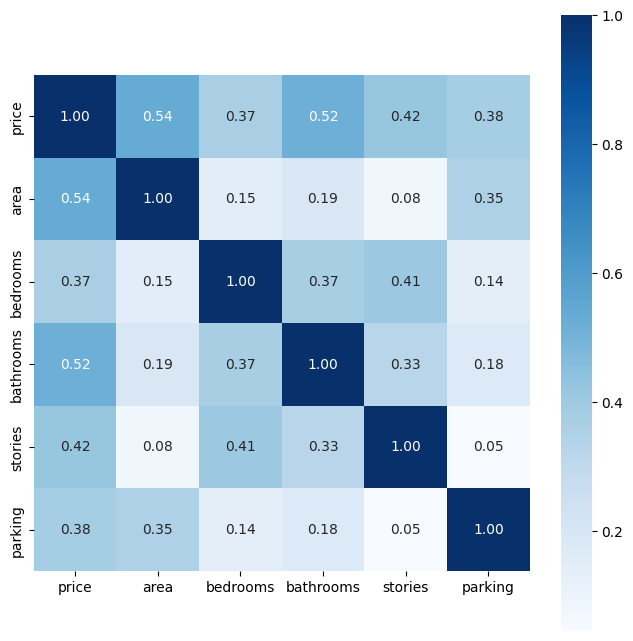

In [65]:
# Construct a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

**Pairwise relationships**

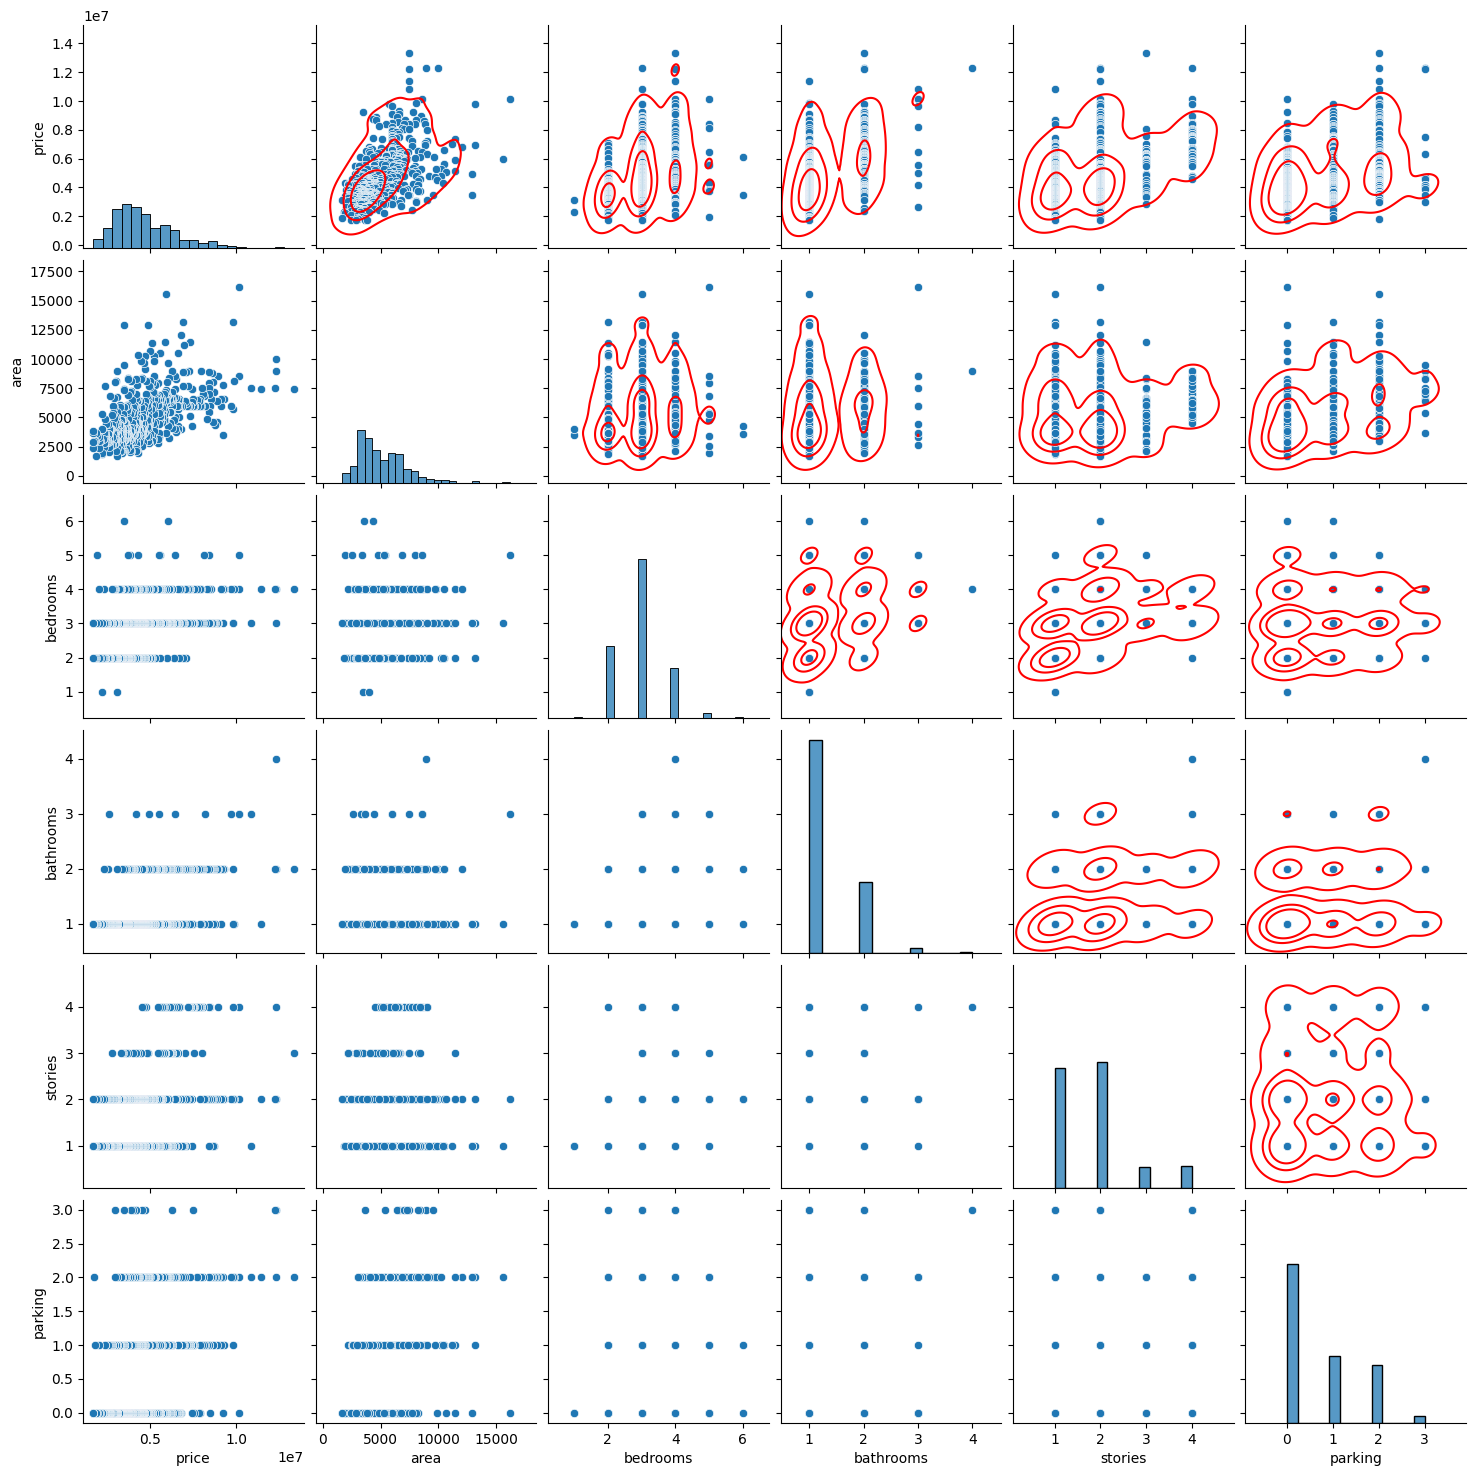

In [66]:
# Pairwise relationships between variables of dataset
# Kernel density estimate (KDE) visualize the distribution of a variable or the relationship between two variables in a pairwise manner
sns.pairplot(data).map_upper(sns.kdeplot, levels=4, color="red")

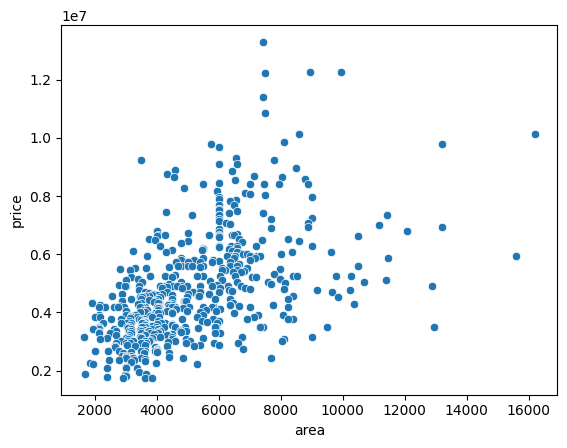

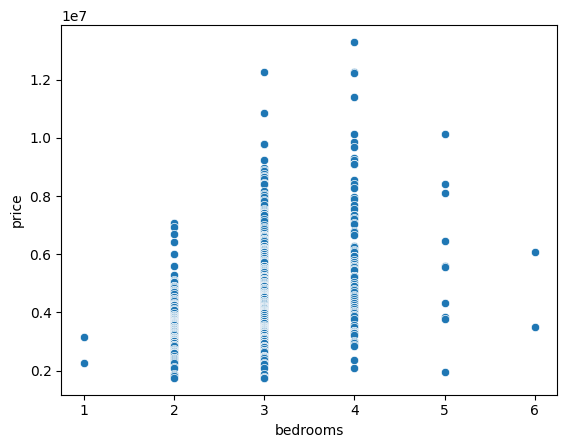

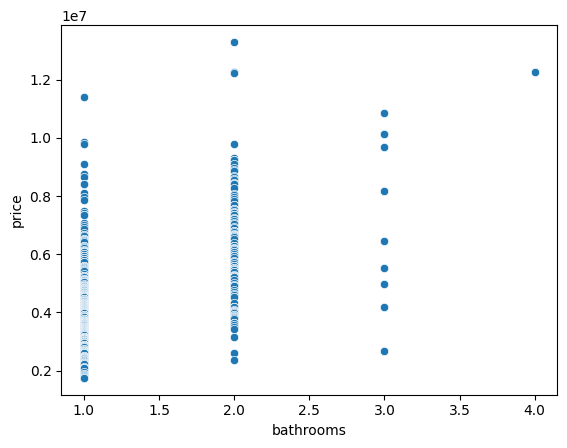

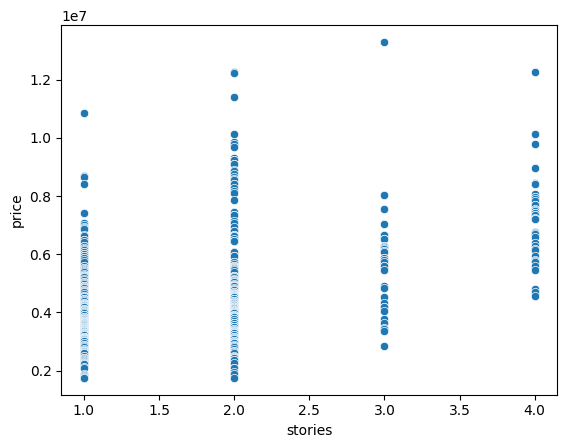

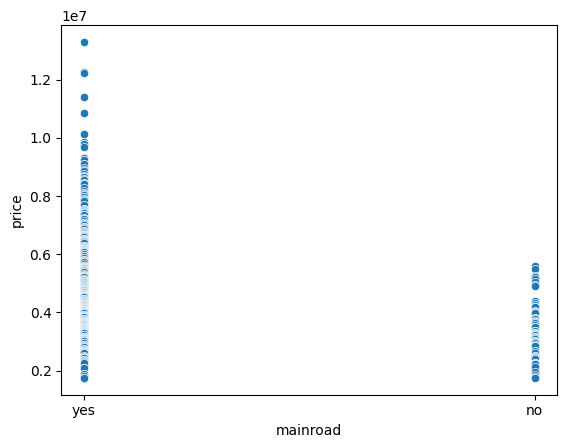

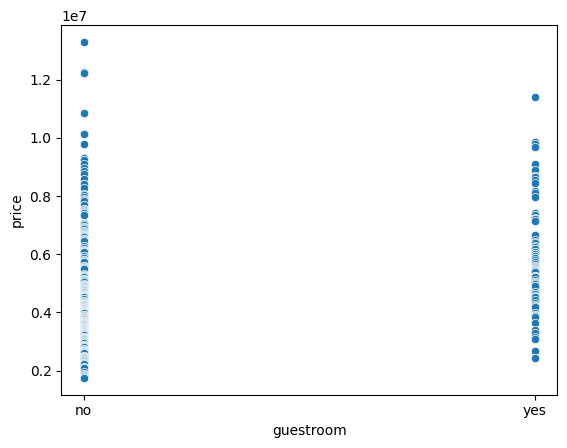

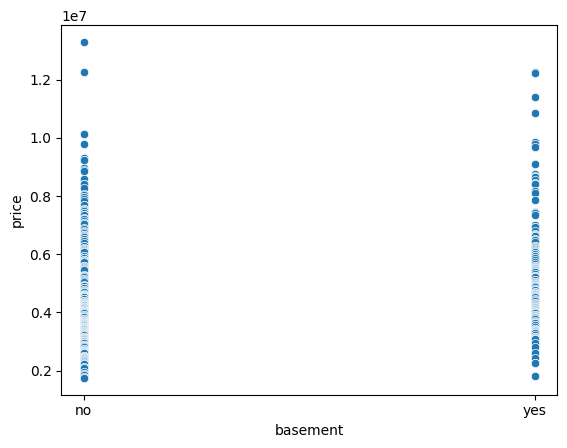

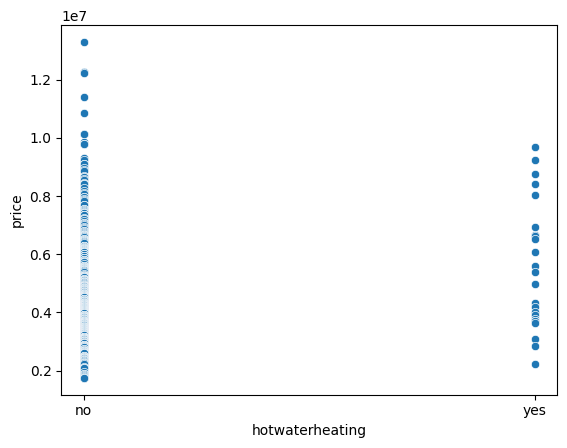

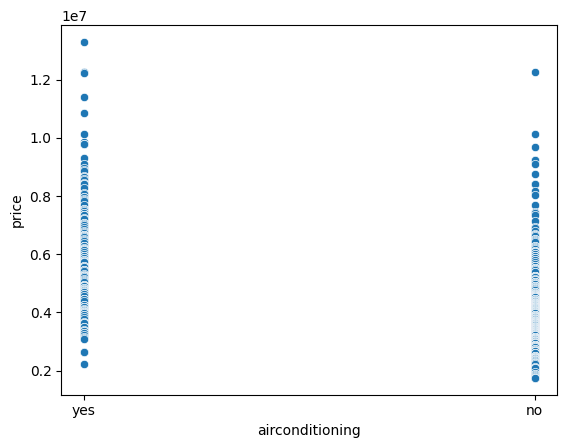

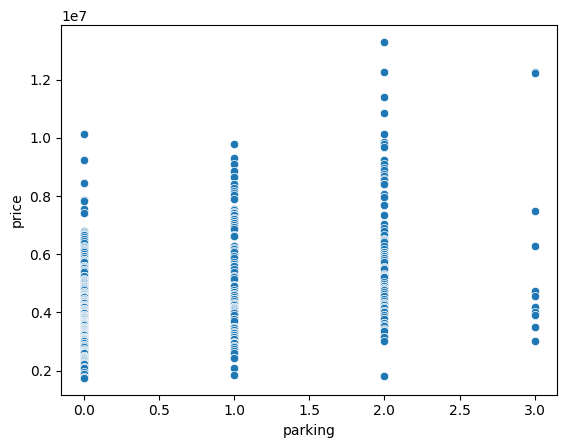

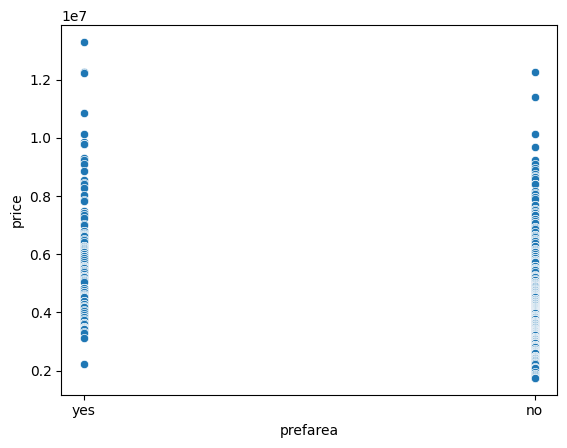

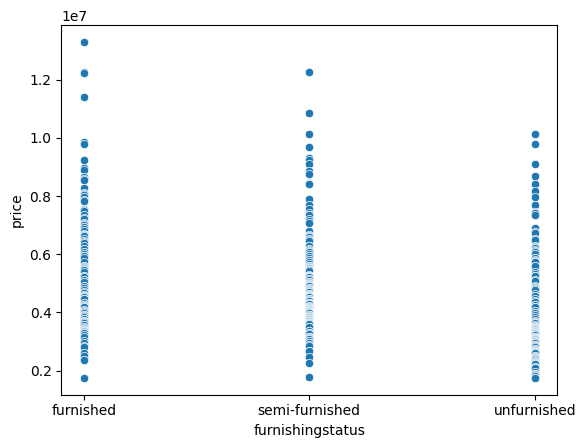

In [67]:
# Visualize the relationship between all features and target variable
for col in features.columns:
  sns.scatterplot(x=col, y='price', data=data)
  plt.show()

**Histogram**

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

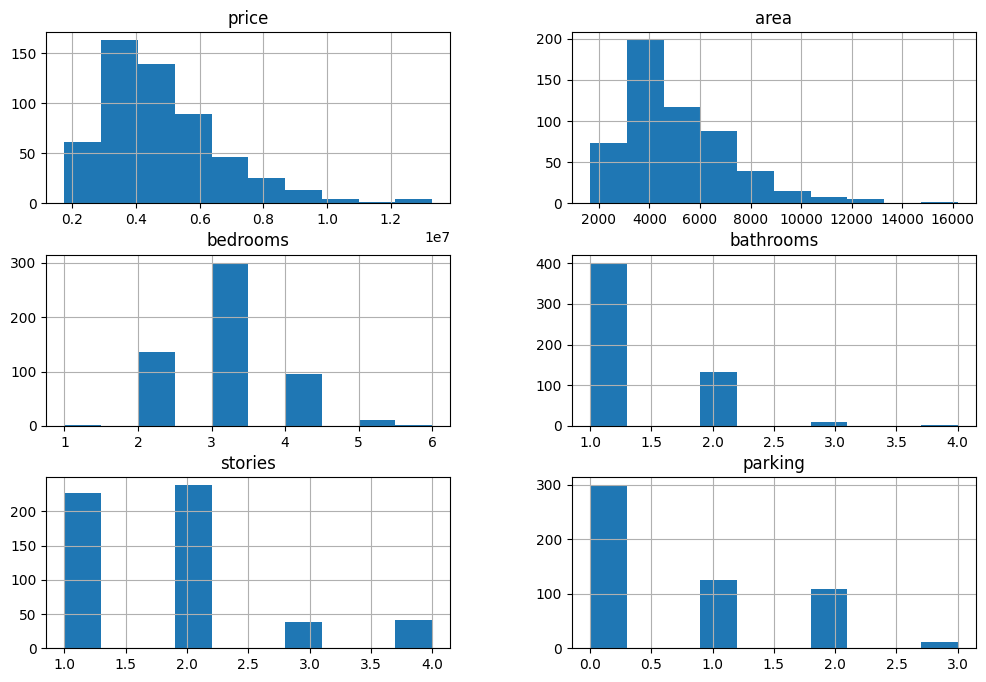

In [68]:
# Histogram for numerical variables
data.hist(figsize=(12, 8))

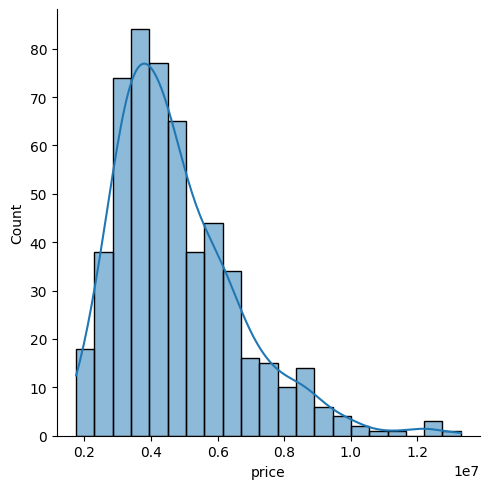

In [69]:
# Analyse distribution of the target variable (Price)
sns.displot(data['price'], kde=True)
plt.show()
#The mode is at the fourth box

**Identify outlier**

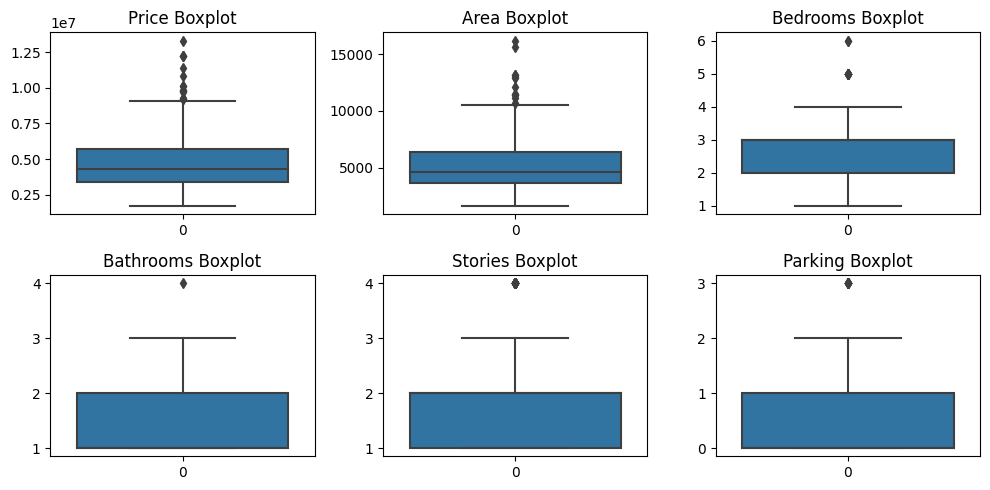

In [70]:
# Identify Outlier
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1.set_title("Price Boxplot")
plt2.set_title("Area Boxplot")
plt3.set_title("Bedrooms Boxplot")

plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
plt1.set_title("Bathrooms Boxplot")
plt2.set_title("Stories Boxplot")
plt3.set_title("Parking Boxplot")

plt.tight_layout() 
#We can see that price and area have noticeable outliers

# **Data Preprocessing**

**Data cleaning**





Check for missing values

In [71]:
# Check if dataset contains null values
print('\033[1mNumber of missing values: \033[0m')
data.isnull().sum()

Number of missing values: 


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Check for duplicates

In [72]:
# Check if dataset contains duplicate rows
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = sum(duplicates)

if num_duplicates > 0:
    # Remove duplicate rows
    data.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


Categorical Features Encoding

In [73]:
# Encode "yes" to 1, "no" to 0
vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
data[vars] = data[vars].replace({'yes':1, 'no':0})

In [74]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [75]:
# Encode "furnishingstatus" using Dummy Encoding
status = pd.get_dummies(data['furnishingstatus'])
status.head(10)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


In [76]:
# 00 -- furnished
# 01 -- unfurnised
# 10 -- semi-furnished
status = pd.get_dummies(data['furnishingstatus'], drop_first=True)
status.head(10)


,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [77]:
# Drop the "frunishingstatus" in original datasets
data.drop("furnishingstatus", inplace=True, axis=1)

# Concatenate the dummy variables with the original datasets
data = pd.concat( [data, status], axis=1 )
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [78]:
data.shape

(545, 14)

In [79]:
# Display data
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


**Feature Scaling (Normalization)**








> Rescale the data to range [ 0-1 ]



In [80]:
# Normalization using MinMaxScaler()
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [81]:
# Display datasets after Normalization
print('Normalization on datasets'.center(200))
display(data_normalized.head())

                                                                                       Normalization on datasets                                                                                        


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


In [82]:
display(data_normalized.describe())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.416514,0.326606
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
data_normalized.to_csv('cleaned_data_house.csv', index=False)

Split dataset into training sets and testing sets

In [84]:
# Split data into training and testing sets
x = data_normalized.drop(['price'],axis=1)
y = data_normalized['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.reset_index(drop=True, inplace=True)

print('                  x sets    y sets')
print('Original set:   ',x.shape, y.shape)
print('Training set:   ',x_train.shape, y_train.shape)
print('Testing set :   ',x_test.shape, y_test.shape)

                  x sets    y sets
Original set:    (545, 13) (545,)
Training set:    (381, 13) (381,)
Testing set :    (164, 13) (164,)


Text(0.5, 1.0, 'Correlation between all the features')

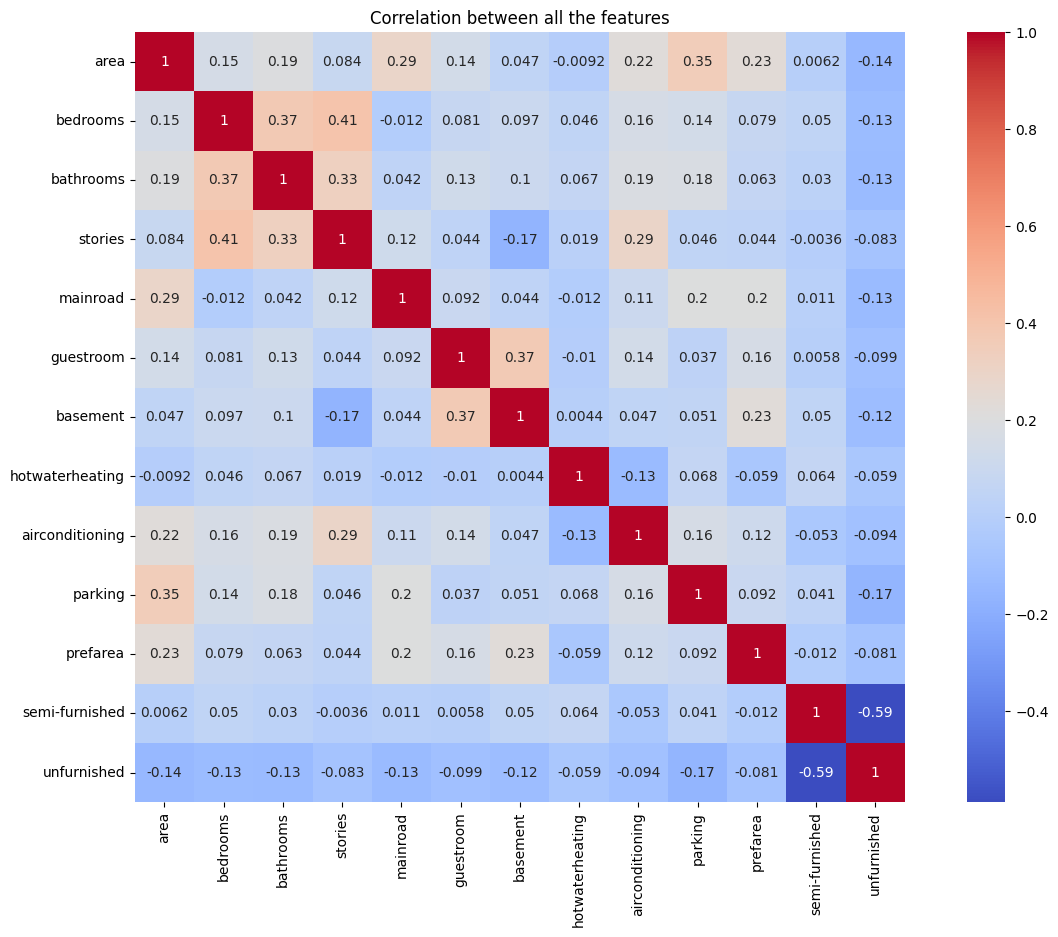

In [85]:
# Plotting Heatmaps for Correlations between all the features
X = data_normalized.drop('price', axis=1)
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), square = True, annot=True, cmap= 'coolwarm')
plt.title('Correlation between all the features')

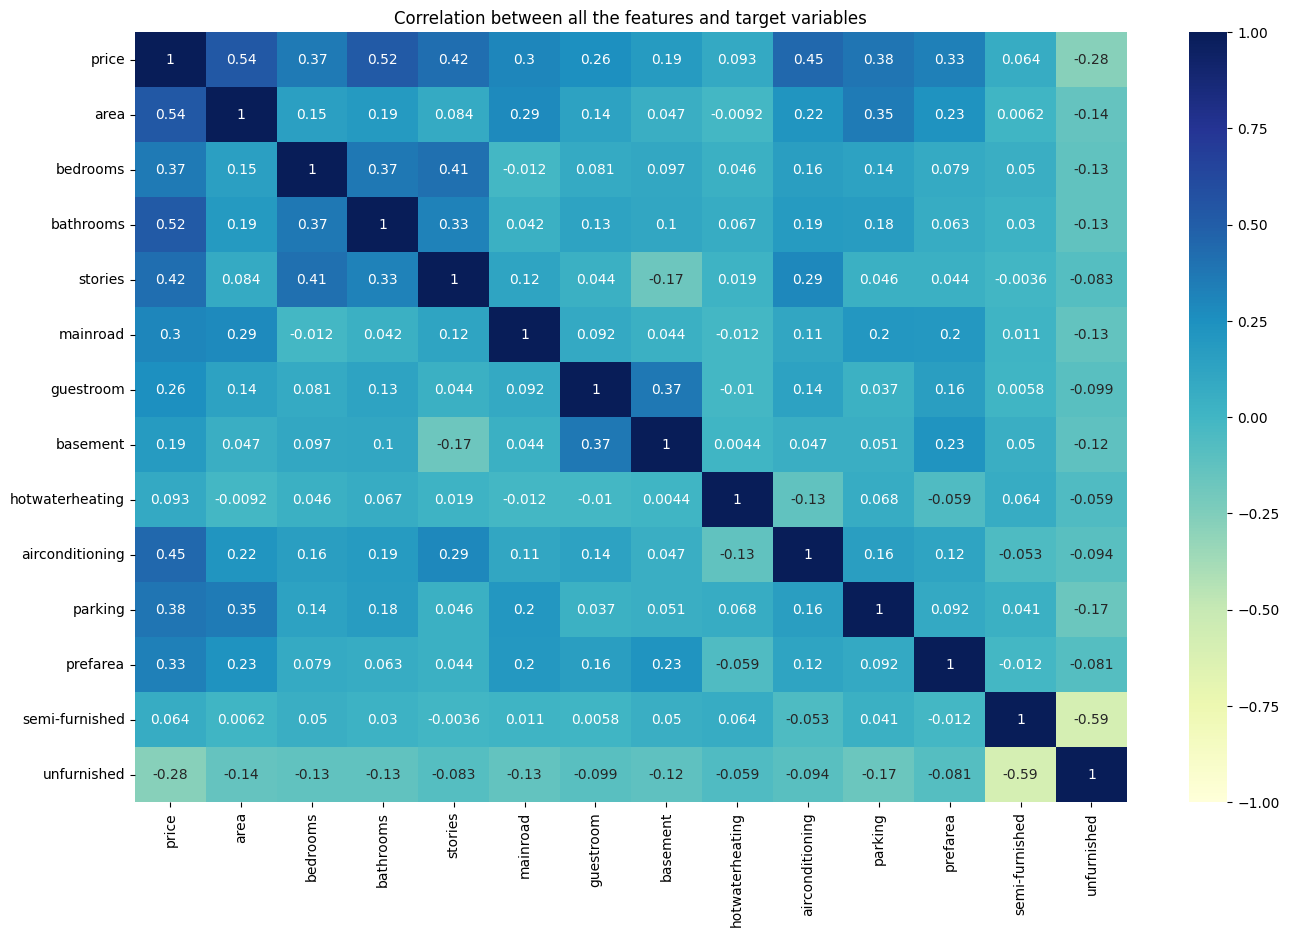

In [86]:
# Check correlation map
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.title('Correlation between all the features and target variables')
plt.show()


# **Model Development**

Linear Regression

In [87]:
# Create a linear regression model and fit it to the training data
LR = LinearRegression().fit(x_train,y_train)

pred1 = LR.predict(x_train) 
pred2 = LR.predict(x_test) 

# **Model Evaluation**

Display Coefficient and Intercept

In [88]:
#Check coefficient 
print("Coefficient: \n",LR.coef_)

#Check intercept
print("Intercept: \n",LR.intercept_)

Coefficient: 
 [ 0.31907615  0.03501868  0.28954576  0.10838119  0.03533105  0.02387104
  0.04178385  0.05336584  0.05938003  0.07873019  0.0440859  -0.0105327
 -0.03386937]
Intercept: 
 0.032607800401282694


Check Accuracy of Prediction

In [89]:
#Check evaluation metrices for training set
mse = mean_squared_error(y_train, pred1)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - pred1))
r2 = r2_score(y_train, pred1)
rss = np.sum(np.square(y_train-pred1))

print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )
print()

#Check evaluation metrices for testing set
mse = mean_squared_error(y_test, pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - pred2))
r2 = r2_score(y_test, pred2)
rss = np.sum(np.square(y_test-pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()

                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.007225017370952
Root Mean Squared Error (RMSE) on training set: 0.085000102182006
Mean Absolute Error (MAE) on training set     : 0.062358891664022
R2-Score on training set                      : 0.693198980702731
Residual Sum of Squares (RSS) on training set : 2.752731618332528

                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.011416723595894
Root Mean Squared Error (RMSE) on testing set: 0.1068490692327
Mean Absolute Error (MAE) on testing set     : 0.07968770041219
R2-Score on testing set                      : 0.646335087889588
Residual Sum of Squares (RSS) on testing set : 1.872342669726668



Result visualization

Pred1 = Prediction using x training datasets


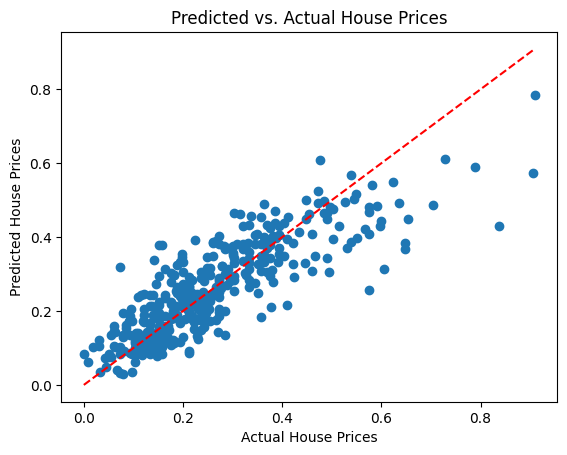

Pred2 = Prediction using x testing datasets


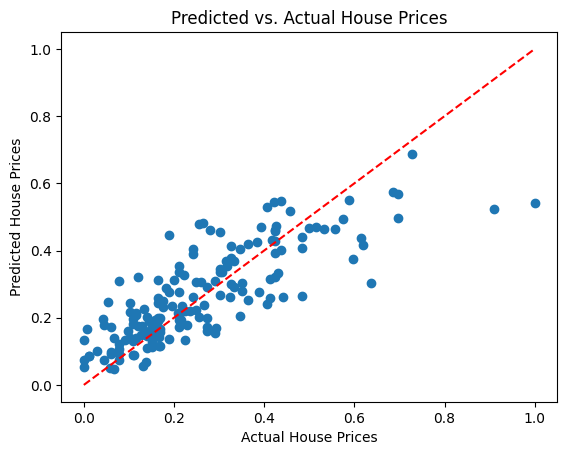

In [90]:
print("Pred1 = Prediction using x training datasets")
plt.scatter(y_train,pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                      
plt.show()

print("Pred2 = Prediction using x testing datasets")
plt.scatter(y_test,pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                      
plt.show()


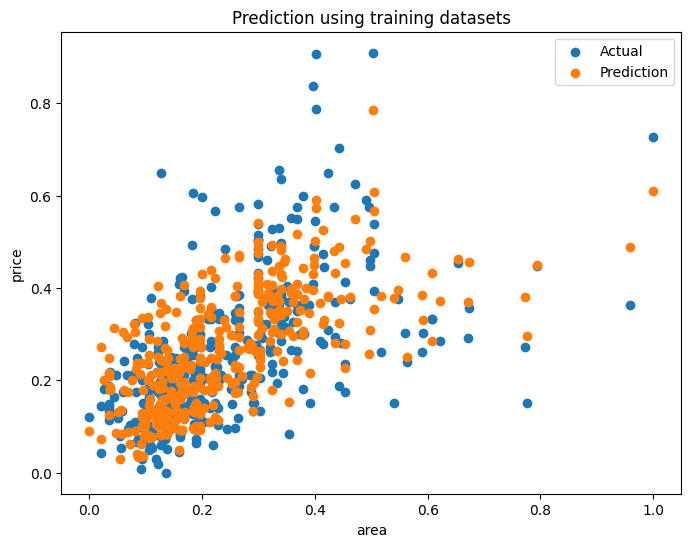

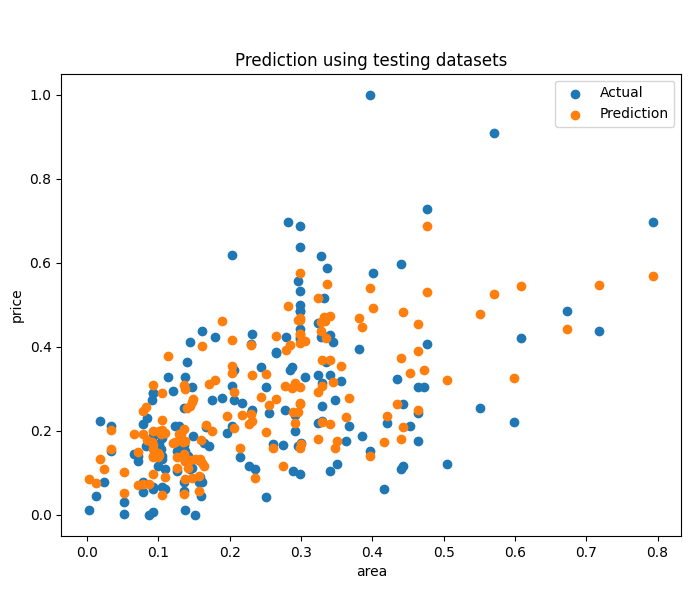

In [91]:
#Scatter Plot
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=pred1, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

Optimization


> Stochastic Gradient Descent (SGDRegressor)



In [92]:
from sklearn.linear_model import SGDRegressor

# Create SGDRegressor with specified learning rate
sgd_reg = SGDRegressor(learning_rate="constant", eta0=0.01)

# Train the model on the training data
sgd_reg.fit(x_train, y_train)

# Get the predicted house prices for the training and testing data
pred1 = sgd_reg.predict(x_train)
pred2 = sgd_reg.predict(x_test)

In [93]:
#Check evaluation metrices for training set
mse = mean_squared_error(y_train, pred1)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - pred1))
r2 = r2_score(y_train, pred1)
rss = np.sum(np.square(y_train-pred1))

print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )
print()

#Check evaluation metrices for testing set
mse = mean_squared_error(y_test, pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - pred2))
r2 = r2_score(y_test, pred2)
rss = np.sum(np.square(y_test-pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()

                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.008239425312271
Root Mean Squared Error (RMSE) on training set: 0.09077128021721
Mean Absolute Error (MAE) on training set     : 0.066629880861562
R2-Score on training set                      : 0.650123459302408
Residual Sum of Squares (RSS) on training set : 3.139221043975332

                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.011627881771541
Root Mean Squared Error (RMSE) on testing set: 0.107832656331658
Mean Absolute Error (MAE) on testing set     : 0.079268645135117
R2-Score on testing set                      : 0.639793873415541
Residual Sum of Squares (RSS) on testing set : 1.906972610532805



Result visualization


y_Pred1 = Prediction using x training datasets



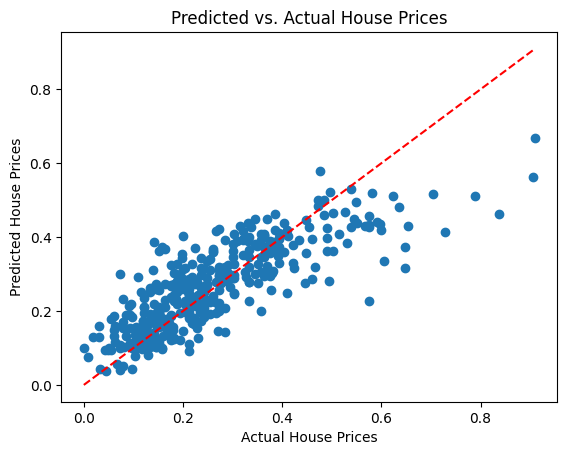


y_Pred2 = Prediction using x testing datasets



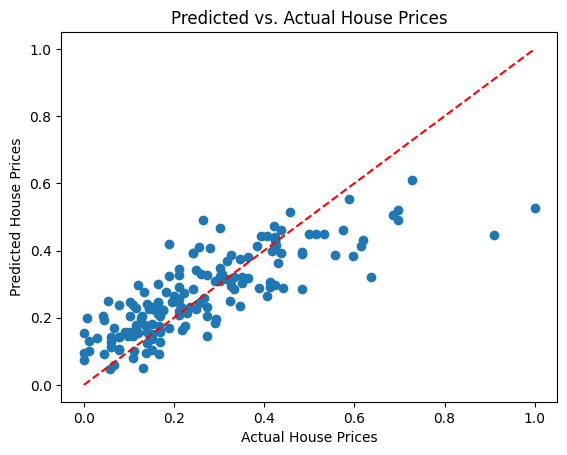

In [94]:
print("\n\033[1my_Pred1 = Prediction using x training datasets\033[0m\n")
plt.scatter(y_train,pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                     
plt.show()

print("\n\033[1my_Pred2 = Prediction using x testing datasets\033[0m\n")
plt.scatter(y_test,pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                      
plt.show()


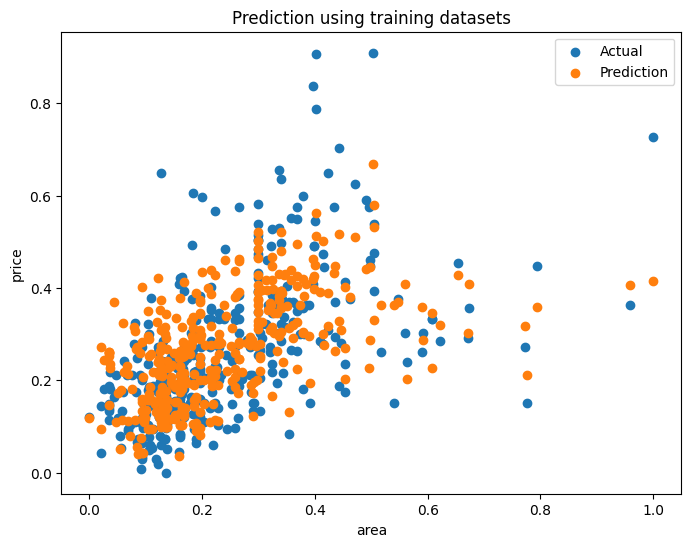

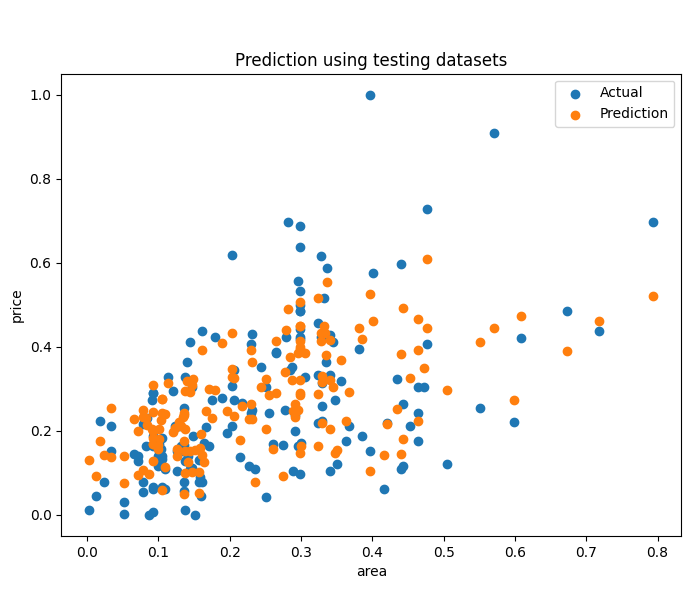

In [95]:
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=pred1, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

Hyperparameter tuning

> Grid Search CV




In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False],'positive': [True, False]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(LR, param_grid, scoring='r2', n_jobs=50)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
LR.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set
y_pred=grid_search.predict(x_train)
y_pred2=grid_search.predict(x_test)

In [97]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred))
r2 = r2_score(y_train, y_pred)
rss = np.sum(np.square(y_train-y_pred))

print(f'\nBest hyperparameters: {best_params}')
print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred2))
r2 = r2_score(y_test, y_pred2)
rss = np.sum(np.square(y_test-y_pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()


Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.007225017370952
Root Mean Squared Error (RMSE) on training set: 0.085000102182006
Mean Absolute Error (MAE) on training set     : 0.062358891664022
R2-Score on training set                      : 0.693198980702731
Residual Sum of Squares (RSS) on training set : 2.752731618332528
                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.011416723595894
Root Mean Squared Error (RMSE) on testing set: 0.1068490692327
Mean Absolute Error (MAE) on testing set     : 0.07968770041219
R2-Score on testing set                      : 0.646335087889588
Residual Sum of Squares (RSS) on testing set : 1.872342669726668



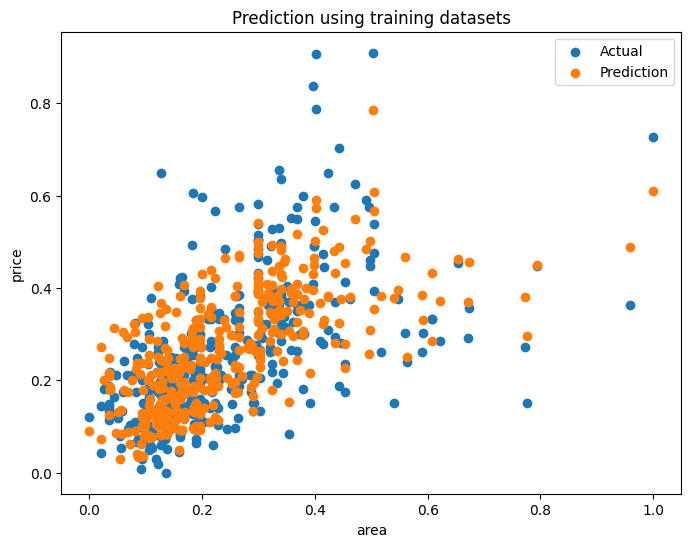

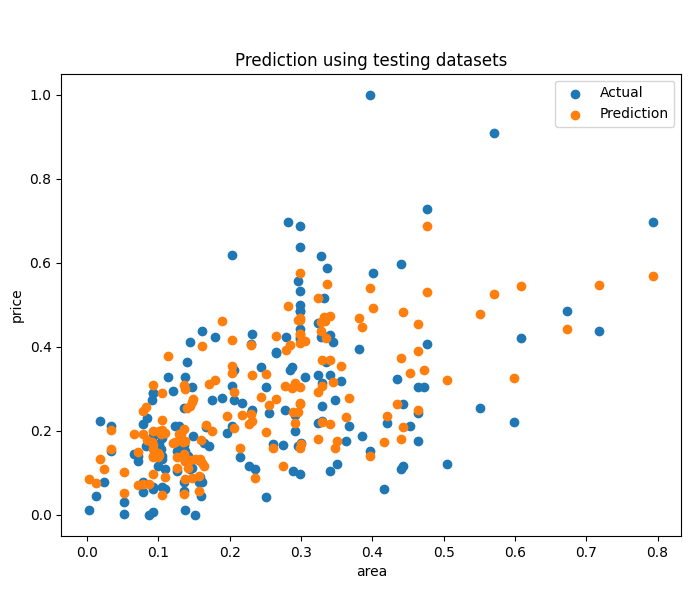

In [98]:
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=y_pred, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= y_pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

Lasso Regression (L1 Regularization)

In [99]:
from sklearn import linear_model

# Declare L1 for Lasso model
L1 = linear_model.Lasso()

# Define the hyperparameters to tune
params = {'alpha': [0.00001,0.0001,0.00019,0.0002,0.00021,0.00025,0.0003,0.00035,0.0004,0.0005,0.001,0.003,0.005,0.01,0.03,0.05, 0.1, 0.5, 1,10,100]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(L1, params, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
L1.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set and train set
y_pred1 = L1.predict(x_train)
y_pred2 = L1.predict(x_test)


In [100]:
mse = mean_squared_error(y_train, y_pred1)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred1))
r2 = r2_score(y_train, y_pred1)
rss = np.sum(np.square(y_train-y_pred1))

print(f'\nBest hyperparameters:',best_params)
print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )

# Check the R2, MAE, RSS, MSE and RMSE of model when predicting testing dataset
r2 = r2_score(y_test, y_pred2)
rss = np.sum(np.square(y_test-y_pred2))
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()


Best hyperparameters: {'alpha': 1e-05}
                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.007225029457583
Root Mean Squared Error (RMSE) on training set: 0.085000173279725
Mean Absolute Error (MAE) on training set     : 0.062348163393637
R2-Score on training set                      : 0.693198467459542
Residual Sum of Squares (RSS) on training set : 2.752736223339249
                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.011416660435266
Root Mean Squared Error (RMSE) on testing set: 0.106848773672259
Mean Absolute Error (MAE) on testing set     : 0.079681578626008
R2-Score on testing set                      : 0.646337044466536
Residual Sum of Squares (RSS) on testing set : 1.872332311383555



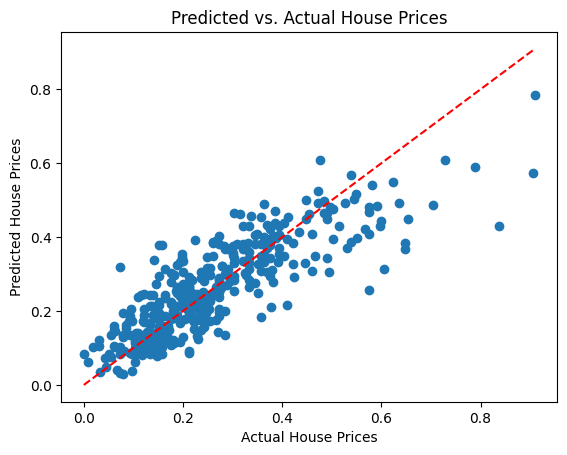

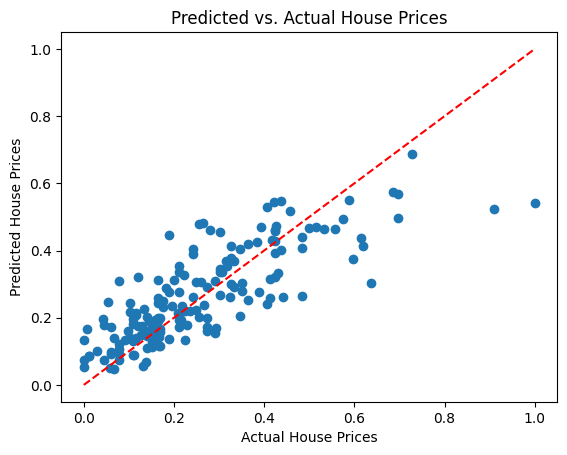

In [101]:
plt.scatter(y_train,y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                       
plt.show()
print("\n")

plt.scatter(y_test,y_pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                    
plt.show()

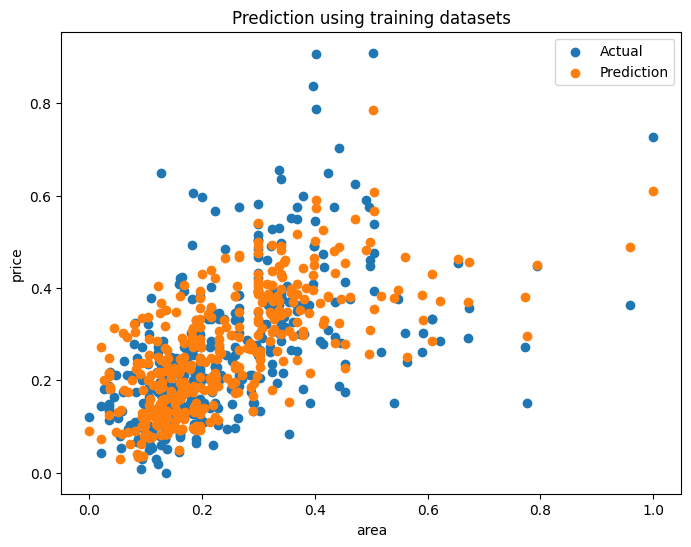

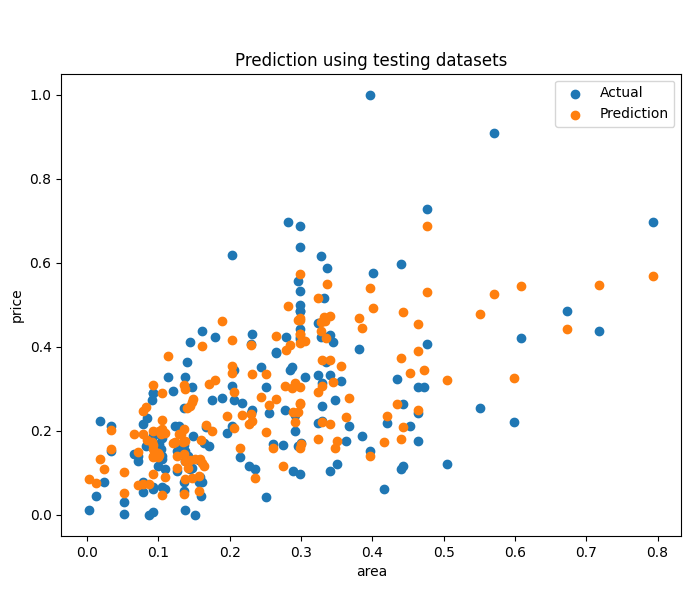

In [102]:
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=y_pred1, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= y_pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()



Ridge Regression (L2 Regularization)

In [103]:
from sklearn.linear_model import Ridge

# Define the hyperparameters to tune
params = {'alpha': [0.00001,0.00003,0.00005,0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01,0.03,0.05, 0.1, 0.5, 1,10,100]}

# Create the linear regression model with Ridge regularization
L2 = Ridge()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(L2, params, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
L2.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set and train set
y_pred = L2.predict(x_train)
y_pred2 = L2.predict(x_test)


In [104]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred))
r2 = r2_score(y_train, y_pred)
rss = np.sum(np.square(y_train-y_pred))

print(f'\nBest hyperparameters:',best_params)
print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred2))
r2 = r2_score(y_test, y_pred2)
rss = np.sum(np.square(y_test-y_pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()



Best hyperparameters: {'alpha': 0.5}
                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.007237207863215
Root Mean Squared Error (RMSE) on training set: 0.08507178065149
Mean Absolute Error (MAE) on training set     : 0.062301682287625
R2-Score on training set                      : 0.69268132721344
Residual Sum of Squares (RSS) on training set : 2.757376195885024
                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.011341038463671
Root Mean Squared Error (RMSE) on testing set: 0.106494311884116
Mean Absolute Error (MAE) on testing set     : 0.079258774631409
R2-Score on testing set                      : 0.648679646327114
Residual Sum of Squares (RSS) on testing set : 1.859930308042122



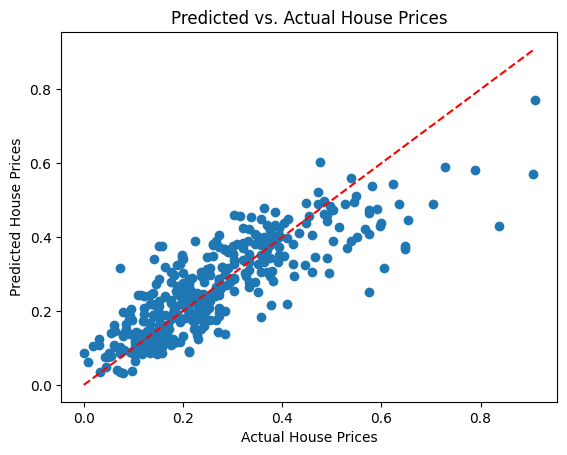

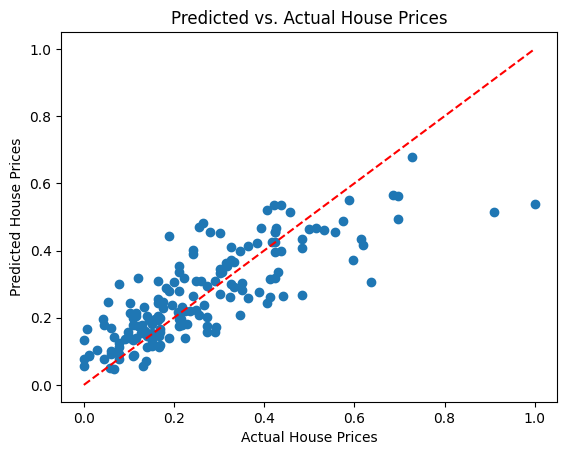

In [105]:
plt.scatter(y_train,y_pred)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                      
plt.show()
print("\n")

plt.scatter(y_test,y_pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs. Actual House Prices")                     
plt.show()

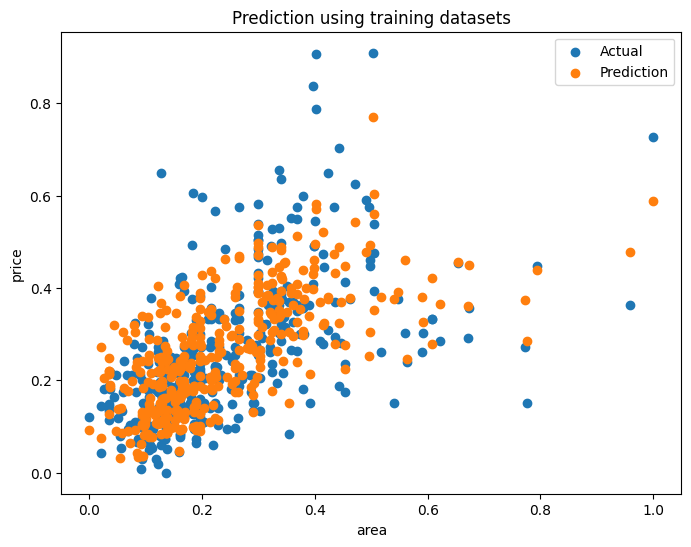

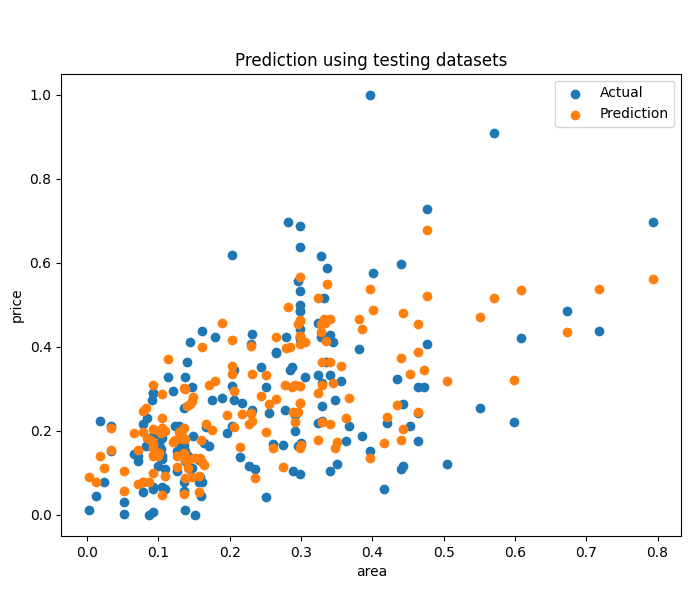

In [106]:
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=y_pred, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price') 
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= y_pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price') 
plt.legend()
plt.show()
